In [1]:
var("α ω")

(α, ω)

In [2]:
ξ(i, x) = x^i * exp(-x)

In [3]:
ξ(0,0)

1

### Identities

In [4]:
a = ξ(2, α*x) * ξ(0, ω*x) 
b = ξ(2, (α+ω) * x) * (α^2) / (α+ω)^2

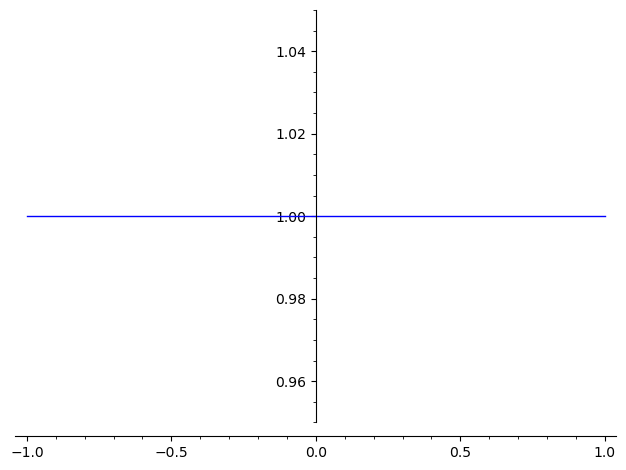

In [5]:
plot((a/b)(α=2.5, ω=0.8) )


In [6]:
a = integral(ξ(2, α*x), x)
b = - 1/ α * (ξ(2, α*x) + 2*ξ(1, α*x) + 2*ξ(0, α*x))

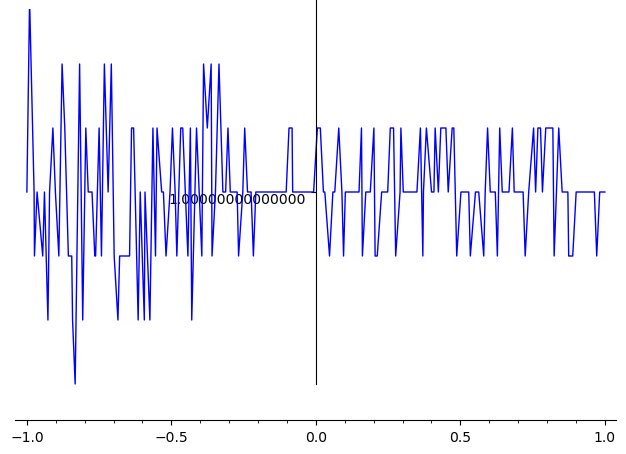

In [7]:
plot((a/b)(α=2.5, ω=0.8) )


### Gamma == 2

In [8]:
var("t td")

(t, td)

In [9]:
heaviside(-0.5)

0

In [10]:
R(t) = ξ(2, α*(t - td)) * heaviside(t - td)

In [11]:
assume(t > 0)
assume(t > td)
assume(α > 0)

In [12]:
mdot = integrate(R(t - x), x, 0, t - td)

In [13]:
simplify(mdot)

-α^2*(((t^2 - 2*t*td + td^2)*α^2 + 2*(t - td)*α + 2)*e^(-t*α + td*α)/α^3 - 2/α^3)

In [14]:
mdotme = (1/α * (2 - ξ(2, α * (t - td)) - 2*ξ(1, α*(t-td)) - 2 * ξ(0, α*(t-td)) ) )* heaviside(t - td)

In [15]:
n((mdot)(α=1.5, td=0.05)(t=0.1))

0.0000886315220087752

In [16]:
n((mdotme)(α=1.5, td=0.05)(t=0.1))

0.0000886315220088307

verbose 0 (3954: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 105 points.
verbose 0 (3954: plot.py, generate_plot_points) Last error message: 'Unable to compute f(0.0417563791163223)'


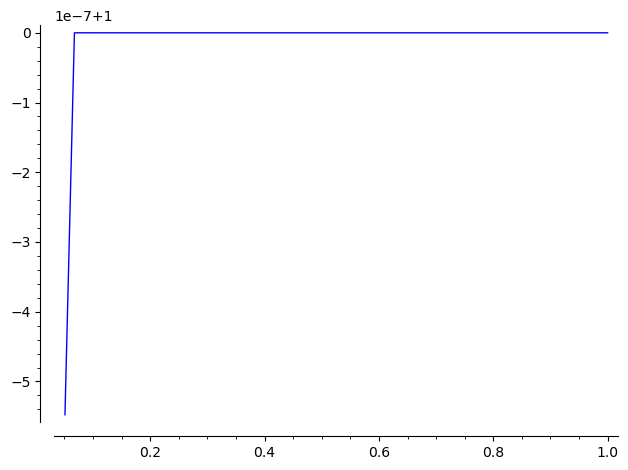

In [17]:
plot((mdot / mdotme)(α=1.5, td=0.05))

In [18]:
Zc = ξ(0, ω*t) * integrate(ξ(0, -ω*x - ω*td) * (
    2 - ξ(2, α*x) - 2*ξ(1, α*x) - 2*ξ(0, α*x) ) / α, x, 0, t-td)

In [19]:
k = α / (α - ω)
h = ω / (α - ω)
dt = t - td

In [20]:
h = k - 1

In [21]:
Zc_me = 1/(α*ω) * (2 - 2*ξ(0, ω*dt)
    + 2*h*(k^2 + k + 1) * (ξ(0, α*dt) - ξ(0, ω*dt))
    + 2*h*(k+1) * ξ(1, α*dt) + h*ξ(2, α*dt)
                  )

In [22]:
Zc_me(α=1.5, td=0.05, ω=2.5)(t=0.1)

1.09279501053772e-6

In [23]:
Zc(α=1.5, td=0.05, ω=2.5)(t=0.1)

1.09279501027214e-6

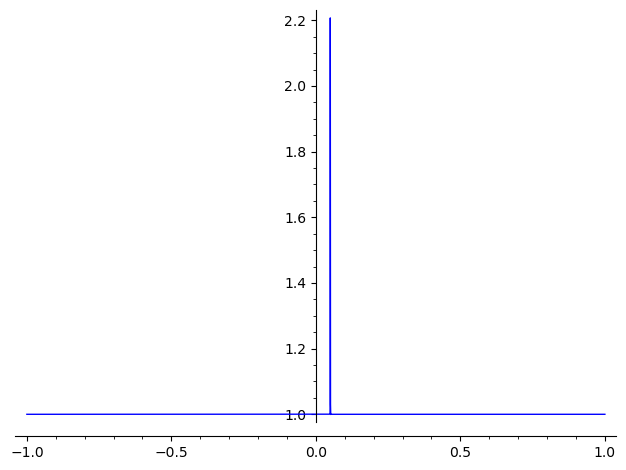

In [24]:
plot((Zc / Zc_me)(α=1.5, td=0.05, ω=2.5))

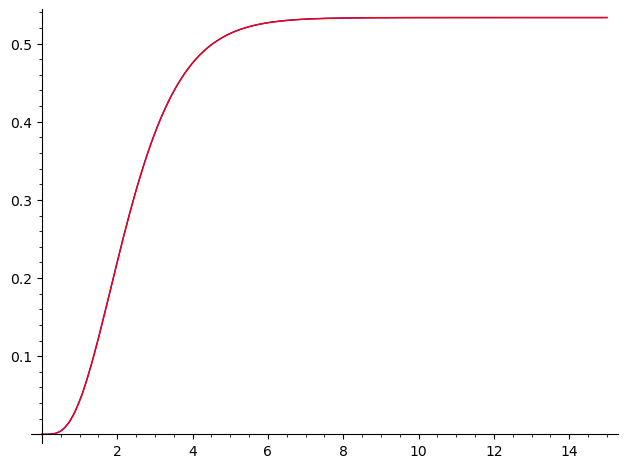

In [25]:
p1 = plot((Zc)(α=1.5, td=0.05, ω=2.5), xmin=0, xmax=15)
p2 = plot((Zc_me)(α=1.5, td=0.05, ω=2.5), xmin=0, xmax=15, color="red")

(p1+p2)

In [28]:
var("m")

m

In [29]:
sum(x**i /factorial(i), i, 0, m).full_simplify()

sum(x^i/factorial(i), i, 0, m)

In [31]:
integral(Ei(-x) * x^2, x)

1/3*x^3*Ei(-x) + 1/3*(x^2 + 2*x + 2)*e^(-x)

# General solutions

In [179]:
ϕn = [1.5, 15, 0.2, 3.5]
Sn = [3, 3.25, 2.14, -0.5]
τs = 2.05
N = len(ϕn)
i_n = [3,4,0, 2]

In [180]:
var("nn")
assume("nn", "integer")

In [181]:

sum(vector(Sn)[nn] for nn in range(N))

7.89000000000000

In [182]:
Mdotstar = sum(Sn[nn]*ξ(i_n[nn], ϕn[nn]*t) for nn in range(N))
Mdotstar

164531.250000000*t^4*e^(-15*t) + 10.1250000000000*t^3*e^(-1.50000000000000*t) - 6.12500000000000*t^2*e^(-3.50000000000000*t) + 2.14000000000000*e^(-0.200000000000000*t)

In [183]:
Mg = Mdotstar * τs

In [184]:
Za = ξ(0, ω*t) / (Mg) * integral(ξ(0, -ω*t) * Mdotstar, t, 0, t)

In [185]:
kn = [ϕn[nn]/(ϕn[nn]-ω) for nn in range(N)]

In [186]:
Za_me = 1/Mg * sum(
    factorial(i_n[nn]) / (ω - ϕn[nn]) * Sn[nn] * kn[nn]^i_n[nn] * (
        -ξ(0, ω*t) + 
        sum(kn[nn]^-j/factorial(j)  * ξ(j, ϕn[nn]*t) for j in range(i_n[nn]+1))
    )
    
    for nn in range(N)
)

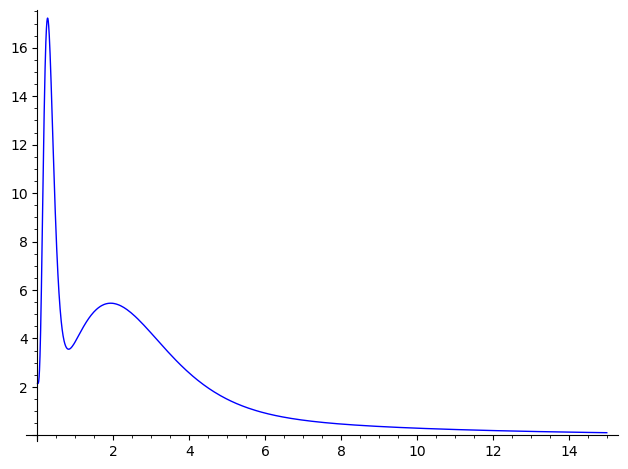

In [187]:
plot(Mdotstar, xmin=0, xmax=15)

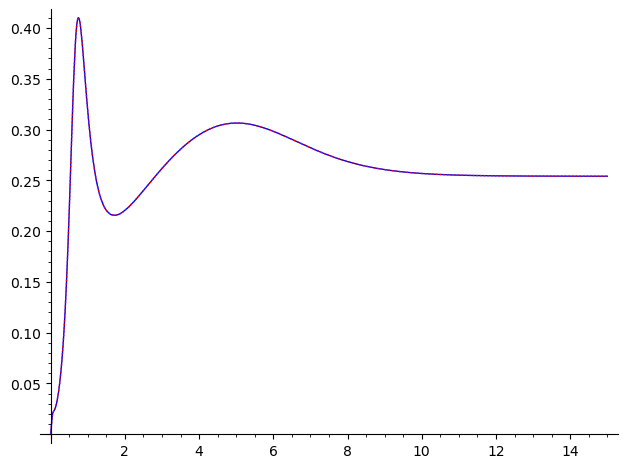

In [195]:
p1 = plot((Za)(ω=2.12), xmin=0, xmax=15)
p2 = plot((Za_me)(ω=2.12), xmin=0, xmax=15, color="red", linestyle=":")

(p1 + p2)